# Outlier detection

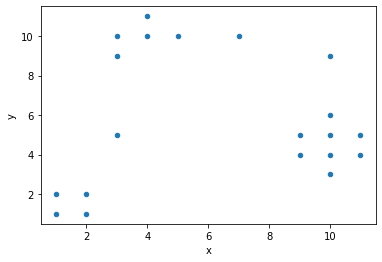

In [1]:
%matplotlib inline
# Generate some fake data clusters
from sklearn.datasets import make_blobs
from matplotlib import pyplot
from pandas import DataFrame
import random
import numpy as np

r_seed = 42

my_points = np.array([[1,1],
                        [1,2],
                        [2,1],
                        [2,2],
                        [3,5],
                        [3,9],
                        [3,10],
                        [4,10],
                        [4,11],
                        [5,10],
                        [7,10],
                        [10,9],
                        [10,6],
                        [9,5],
                        [10,5],
                        [11,5],
                        [9,4],
                        [10,4],
                        [11,4],
                        [10,3]])
# Generate three 2D clusters totalling 1000 points 
X, y = make_blobs(n_samples=1000, centers=3, n_features=2, random_state=r_seed)
random.seed(r_seed)
random_pts = []

# Generate random noise points that could be or could not be close to the clustered neighborhoods
for i in range(50):
    random_pts.append([random.randint(-10, 10), random.randint(-10, 10)])

X = np.append(X, random_pts, axis=0)
X = my_points
df = DataFrame(dict(x=X[:,0], y=X[:,1]))
df.plot(kind='scatter', x='x', y='y')
pyplot.show()

k = 4
Nearest neighbours per point:
[[ 0  2  1  3]
 [ 1  3  0  2]
 [ 2  0  3  1]
 [ 3  2  1  0]
 [ 4  3  1  5]
 [ 5  6  7  8]
 [ 6  7  5  8]
 [ 7  9  6  8]
 [ 8  7  9  6]
 [ 9  7  8  6]
 [10  9  7  8]
 [11 12 10 14]
 [12 14 15 13]
 [13 14 16 12]
 [14 15 12 13]
 [15 18 14 12]
 [16 17 13 14]
 [17 18 14 16]
 [18 17 15 14]
 [19 17 18 16]]
Distances per point:
[[0.         1.         1.         1.41421356]
 [0.         1.         1.         1.41421356]
 [0.         1.         1.         1.41421356]
 [0.         1.         1.         1.41421356]
 [0.         3.16227766 3.60555128 4.        ]
 [0.         1.         1.41421356 2.23606798]
 [0.         1.         1.         1.41421356]
 [0.         1.         1.         1.        ]
 [0.         1.         1.41421356 1.41421356]
 [0.         1.         1.41421356 2.        ]
 [0.         2.         3.         3.16227766]
 [0.         3.         3.16227766 4.        ]
 [0.         1.         1.41421356 1.41421356]
 [0.         1.         1.     

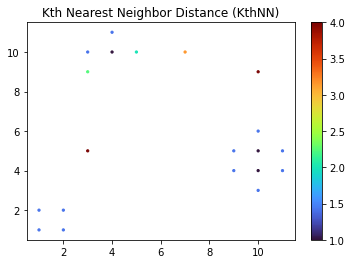

average distance to each points nearest neighbors:
[0.85355339 0.85355339 0.85355339 0.85355339 2.69195723 1.16257038
 0.85355339 0.75       0.95710678 1.10355339 2.04056942 2.54056942
 0.95710678 0.85355339 0.75       0.85355339 0.85355339 0.75
 0.85355339 0.95710678]


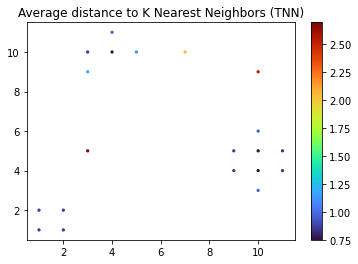

all distances of all points:
[0.5690355937288492, 0.5690355937288492, 0.5690355937288492, 0.5690355937288492, 2.176583886398197, 0.6720412585204983, 0.6720412585204983, 0.6523689270621825, 0.6523689270621825, 0.6523689270621825, 0.9647076018784563, 1.832769129584473, 0.6523689270621825, 0.6720412585204983, 0.6523689270621825, 0.6720412585204983, 0.5690355937288492, 0.6523689270621825, 0.5690355937288492, 0.6523689270621825]
TNN/average of all distances of all points:
[1.5, 1.5, 1.5, 1.5, 1.2367808338242976, 1.7299092432622736, 1.2700907567377264, 1.1496562280755465, 1.4671250292326046, 1.6916093713459244, 2.1152206233979554, 1.3861917325168474, 1.4671250292326046, 1.2700907567377264, 1.1496562280755465, 1.2700907567377264, 1.5, 1.1496562280755465, 1.5, 1.4671250292326046]


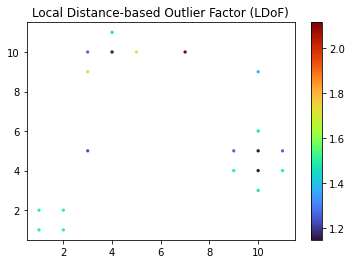

local_reach_density lrd of each point:
[0.70710678 0.70710678 0.70710678 0.70710678 0.27085904 0.54790294
 0.65957675 0.6862915  0.6862915  0.62361503 0.35321475 0.28244044
 0.76297428 0.76297428 0.76297428 0.76297428 0.76297428 0.82842712
 0.76297428 0.76297428]
LOFs of each point:
[1.0, 1.0, 1.0, 1.0, 2.061012556831288, 1.1772444058760956, 0.9779236006314568, 0.9674368638147347, 0.9674368638147347, 1.0646691671366462, 1.6628784421167995, 1.9133270359636632, 1.0, 1.0, 1.0, 1.0000000000000002, 1.0214466094067263, 0.9407435698305462, 1.0214466094067263, 1.0214466094067263]


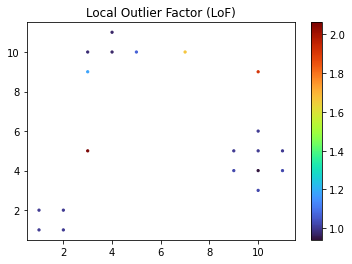

In [2]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

k = 4
print(f"k = {k}")
knn = NearestNeighbors(n_neighbors=k)

knn.fit(X)
# Gather the kth nearest neighbor distance
neighbors_and_distances = knn.kneighbors(X)
print(f"Nearest neighbours per point:")
print(neighbors_and_distances[1])
print(f"Distances per point:")
print(neighbors_and_distances[0])
knn_distances = neighbors_and_distances[0]
neighbors = neighbors_and_distances[1]
kth_distance = [x[-1] for x in knn_distances]
print(f"kth_distances per point:")
print(kth_distance)

plt.title("Kth Nearest Neighbor Distance (KthNN)")
plt.scatter(X[:, 0], X[:, 1], c=kth_distance, cmap='turbo', s=5.0, label="Data points")
plt.colorbar();
plt.axis("tight")
plt.show()

# Gather the average distance to each points nearest neighbor 
tnn_distance = np.mean(knn_distances, axis=1)
print(f"average distance to each points nearest neighbors:")
print(tnn_distance)

plt.title("Average distance to K Nearest Neighbors (TNN)")
plt.scatter(X[:, 0], X[:, 1], c=tnn_distance, cmap='turbo', s=5.0, label="Data points")
plt.colorbar();
plt.axis("tight")
plt.show()

# Gather the inner distance for pts
def knn_inner_distance(pts):
    summation = 0
    for i in range(len(pts)):
        pt = pts[i]
        for other_pt in pts[i:]:
            summation = summation + np.linalg.norm(pt - other_pt)
    return summation / (k * (k - 1))

inner_distances = [knn_inner_distance(X[ns]) for ns in neighbors]
print(f"all distances of all points:")
print(inner_distances)
ldofs = [x/y for x,y in zip(tnn_distance, inner_distances)]
print(f"TNN/average of all distances of all points:")
print(ldofs)

plt.title("Local Distance-based Outlier Factor (LDoF)")
plt.scatter(X[:, 0], X[:, 1], c=ldofs, cmap='turbo', s=5.0, label="Data points")
plt.colorbar();
plt.axis("tight")
plt.show()

local_reach_density = []
for i in range(X.shape[0]):
    pt = X[i]
    sum_reachability = 0
    neighbor_distances = knn_distances[i]
    pt_neighbors = neighbors[i]
    for neighbor_distance, neighbor_index in zip(neighbor_distances, pt_neighbors):
        neighbors_kth_distance = kth_distance[neighbor_index]
        sum_reachability = sum_reachability + max([neighbor_distance, neighbors_kth_distance])
        
    avg_reachability = sum_reachability / k
    local_reach_density.append(1/avg_reachability)

local_reach_density = np.array(local_reach_density)
print(f"local_reach_density lrd of each point:")
print(local_reach_density)
lofs = []
for i in range(X.shape[0]):
    pt = X[i]
    avg_lrd = np.mean(local_reach_density[neighbors[i]])
    lofs.append(avg_lrd/local_reach_density[i])
print(f"LOFs of each point:")
print(lofs)
plt.title("Local Outlier Factor (LoF)")
plt.scatter(X[:, 0], X[:, 1], c=lofs, cmap='turbo', s=5.0, label="Data points")
plt.colorbar();
plt.axis("tight")
plt.show()

# Or just use
# from sklearn.neighbors import LocalOutlierFactor